In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from scipy import stats

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
ticker=['BBVA.MX']
start,end='2016-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

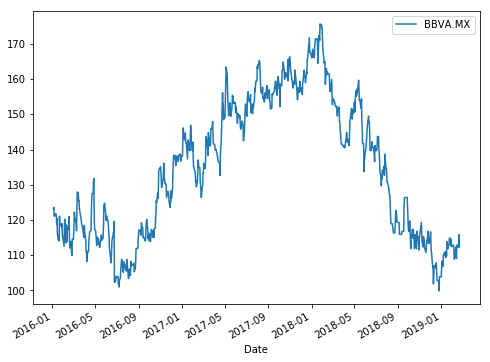

In [9]:
closes.plot(figsize=(8,6))

In [10]:
ret=np.log(closes/closes.shift()).dropna()
#prueba normalidad
stats.jarque_bera(ret)

(1660.383573683066, 0.0)

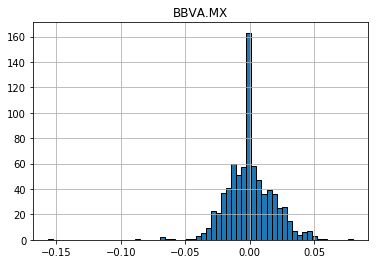

In [11]:
plt.title('BBVA.MX')
plt.hist(ret['BBVA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [12]:
a2016=ret.iloc[0:251,]
a2017=ret.iloc[251:502,]
a2018=ret.iloc[502:753,]

In [13]:
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['BBVA.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['BBVA.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['BBVA.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['BBVA.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.000455998,0.000765301,-0.00190309,-0.00011751
Rend anual,0.114912,0.192856,-0.479578,-0.0296126
Vol diaria,0.0213094,0.0166984,0.0184344,0.0188079
Vol anual,0.338277,0.265079,0.292637,0.298567


### Discusión datos tabla


<div class=text-justify> Todo 2016 y 2017 muestra rendimientos positivos tanto anuales como diarios, con una volatilidad de .26 a .33. 2018 muestra un rendimeinto negativo tanto anual como diario, en general, el rensimiento anual logra ser positivo pero por muy poco.  </div>

In [35]:
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=a2018.mean()
ret_sum.loc['Volatility']=a2018.std()

In [36]:
n=1000
for x in range (0,3):
    mu= ret_sum['BBVA.MX']['Mean']
    sigma= ret_sum['BBVA.MX']['Volatility']
    s0=112.32
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    112.335  112.499  112.875  117.197
liminf  106.258  94.2447  82.8844  46.5486
limsup  119.004  134.848  154.156  281.162
            st1     st10     st30    st252
Mean    112.336  112.499  112.868  117.098
liminf  104.411  89.1615  75.2949  35.2394
limsup   120.62  140.724  165.974  348.282
            st1     st10     st30    st252
Mean    112.337  112.503  112.878  117.167
liminf  104.175  88.5265  74.3685  33.9974
limsup  121.396  143.608  171.911  385.629


### BETA

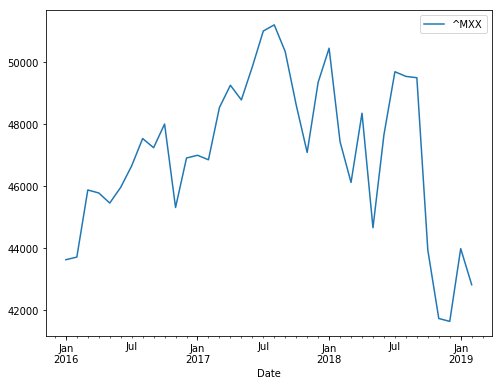

In [46]:
# Importar datos MENSUALES
names=['^MXX']
start_date='2016-01-01'
end_date='2019-02-28'
monthly_closes=get_closes(names,start_date=start_date,end_date=end_date,freq='m')
monthly_closes.plot(figsize=(8,6))

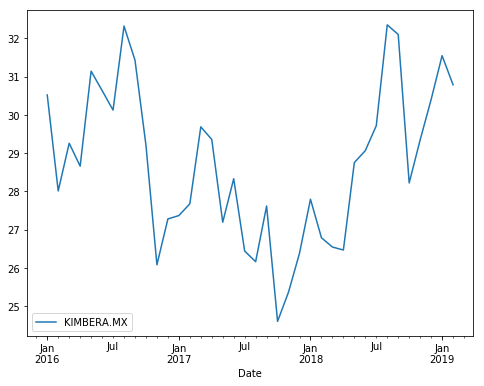

In [53]:
names=['KIMBERA.MX']
start_date='2016-01-01'
end_date='2019-02-28'
monthly_closes=get_closes(names,start_date=start_date,end_date=end_date,freq='m')
monthly_closes.plot(figsize=(8,6))

In [5]:
ticker=['BBVA.MX','GFINBURO.MX','GFNORTEO.MX','GMEXICOB.MX','KIMBERA.MX']
start,end='2016-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

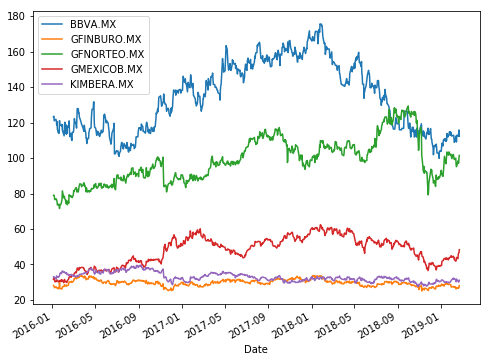

In [6]:
closes.plot(figsize=(8,6));


In [7]:
ret=np.log(closes/closes.shift()).dropna()
cov=ret.cov()
cov

,BBVA.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,KIMBERA.MX
BBVA.MX,3.537382e-04,0.000038,0.000040,0.000034,6.748989e-08
GFINBURO.MX,3.771290e-05,0.000330,0.000120,0.000067,8.545505e-05
GFNORTEO.MX,3.961608e-05,0.000120,0.000351,0.000072,8.125900e-05
GMEXICOB.MX,3.444352e-05,0.000067,0.000072,0.000325,3.893866e-05
KIMBERA.MX,6.748989e-08,0.000085,0.000081,0.000039,2.452575e-04


In [32]:
cov=ret.corr()
cov

,BBVA.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,KIMBERA.MX
BBVA.MX,1.000000,0.110299,0.112384,0.101508,-0.005935
GFINBURO.MX,0.110299,1.000000,0.352319,0.203674,0.288852
GFNORTEO.MX,0.112384,0.352319,1.000000,0.212636,0.245451
GMEXICOB.MX,0.101508,0.203674,0.212636,1.000000,0.124563
KIMBERA.MX,-0.005935,0.288852,0.245451,0.124563,1.000000


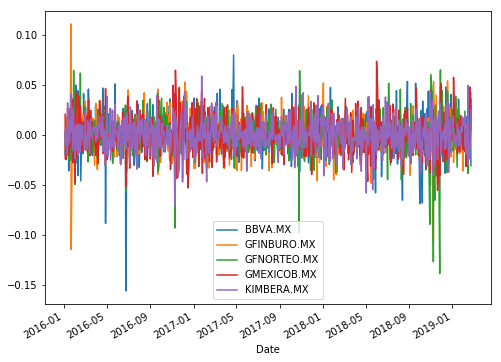

In [8]:
ret.plot(figsize=(8,6));

In [9]:
an_ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
an_ret_sum.loc['Mean']=ret.mean()*252
an_ret_sum.loc['Volatility']=ret.std()*np.sqrt(252)
an_ret_sum

,BBVA.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,KIMBERA.MX
Mean,-0.0296126,-0.000959362,0.0796123,0.134778,-0.0174928
Volatility,0.298567,0.288586,0.297527,0.286396,0.248606


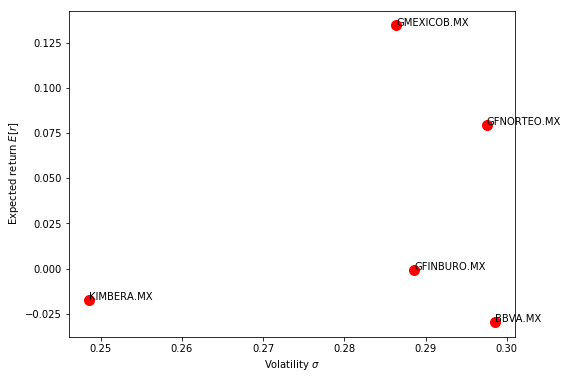

In [10]:
x=an_ret_sum.loc['Volatility'].values
y=an_ret_sum.loc['Mean'].values
plt.figure(figsize=(8,6))
plt.plot(x,y,'ro',ms=10)
plt.xlabel('Volatility $\sigma$')
plt.ylabel('Expected return $E[r]$')
plt.text(x[0],y[0],ticker[0])
plt.text(x[1],y[1],ticker[1])
plt.text(x[2],y[2],ticker[2])
plt.text(x[3],y[3],ticker[3])
plt.text(x[4],y[4],ticker[4])
plt.show()

In [17]:

p1=112.317497
p2=28.093805
p3=101.478256
p4=48.336765
p5=31.154127
total=p1*100+p2*100+p3*100+p4*100+p5*100
total


32138.045

In [18]:
ws=np.matrix([p1*100/total,p2*100/total,p3*100/total,p4*100/total,p5*100/total])
wt=np.transpose(ws)
cov=np.matrix(cov)

In [19]:
VI=32138.045
x=ws*cov*wt
print(x)

[[0.00012787]]


In [21]:
var90=(-1.28)*(VI)*np.sqrt(.00012787)*np.sqrt(1)
var95=(-1.64485)*(VI)*np.sqrt(.00012787)*np.sqrt(1)
var99=(-2.33)*(VI)*np.sqrt(.00012787)*np.sqrt(1)
print(var90)
print(var95)
print(var99)

-465.1722049111553
-597.7644541000888
-846.7587792523374


In [45]:
var90=(-1.28)*(VI)*np.sqrt(.000128)*np.sqrt(5)
var95=(-1.64)*(VI)*np.sqrt(.000128)*np.sqrt(5)
var99=(-2.33)*(VI)*np.sqrt(.000128)*np.sqrt(5)
print(var90)
print(var95)
print(var99)

-1064.0514930054676
-1363.3159754132553
-1936.9062333615154


In [47]:
var90=(-1.28)*(VI)*np.sqrt(.000128)
var95=(-1.64)*(VI)*np.sqrt(.000128)
var99=(-2.33)*(VI)*np.sqrt(.000128)
print(var90)
print(var95)
print(var99)

-475.8582939840735
-609.6934391670941
-866.2108007678838
